<a href="https://colab.research.google.com/github/malyokhova/Physics/blob/lab-5.04/5_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

-5.4999813115869876e-05 0.08434589374976185 -36.151535617697796 5458.801981228977


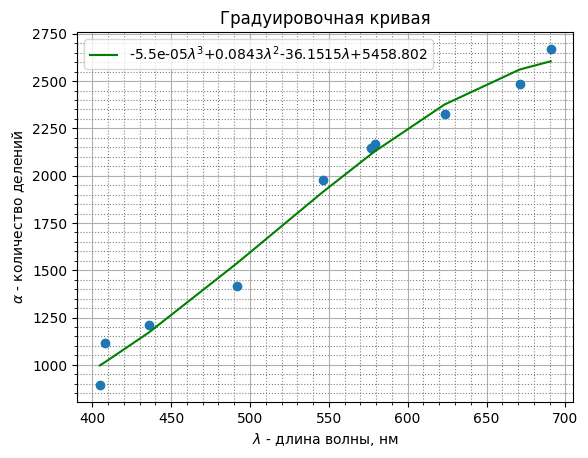

In [ ]:
wavelengths = [690.7, 671.1, 623.4, 579.0, 576.9, 546.0, 491.6, 435.8, 407.8, 404.7]
degrees = [2670, 2482, 2326, 2168, 2148, 1978, 1418, 1212, 1118, 894]

a, b, c, d = np.polyfit(wavelengths, degrees, 3)

print(a, b, c, d)

grad_func = lambda w: math.pow(w, 3) * a + math.pow(w, 2) * b + w * c + d

degrees_grad = [grad_func(w) for w in wavelengths]

a_str = str(round(a, 8))
b_str = str(round(b, 4)) if b < 0 else '+' + str(round(b, 4))
c_str = str(round(c, 4)) if c < 0 else '+' + str(round(c, 4))
d_str = str(round(d, 4)) if d < 0 else '+' + str(round(d, 4))

grad_label = a_str + r'$\lambda^3$' + b_str + r'$\lambda^2$' + c_str + r'$\lambda$' + d_str

plt.minorticks_on()
plt.grid(True, which='both')
plt.grid(which='minor', color='gray', linestyle=':')

plt.plot(wavelengths, degrees, 'o')
plt.plot(wavelengths, degrees_grad, color='green', label=grad_label)
plt.title("Градуировочная кривая")
plt.xlabel(r'$\lambda$ - длина волны, нм')
plt.ylabel(r'$\alpha$ - количество делений')
plt.legend()

plt.show()

In [ ]:
def balmer(n):
  B = 346.61 # в нм
  return B * math.pow(n, 2) / (math.pow(n, 2) - 4)

In [ ]:
#вытащила из графика https://www.desmos.com/calculator/7nlnubla8d

h_wl_red = 639.522
h_wl_blue = 481.934
h_wl_purple = 390.4

h_wl_red_real = balmer(3)
h_wl_blue_real = balmer(4)
h_wl_purple_real = balmer(6)

print('красный', 'по графику:', h_wl_red, 'по формуле:', round(h_wl_red_real, 3))
print('синий', 'по графику:', h_wl_blue, 'по формуле:', round(h_wl_blue_real, 3))
print('фиолетовый', 'по графику:', h_wl_purple, 'по формуле:', round(h_wl_purple_real, 3))

красный по графику: 639.522 по формуле: 623.898
синий по графику: 481.934 по формуле: 462.147
фиолетовый по графику: 390.4 по формуле: 389.936


Погрешности длин волн

In [ ]:
abs_red = h_wl_red - h_wl_red_real
rel_red = abs_red / h_wl_red_real * 100
abs_blue = h_wl_blue - h_wl_blue_real
rel_blue = abs_blue / h_wl_blue_real * 100
abs_purple = h_wl_purple - h_wl_purple_real
rel_purple = abs_purple / h_wl_purple_real * 100
print('Красный\n абсолютная погрешность: ', round(abs_red, 3), 'относительная погрешность', round(rel_red, 3))
print('Синий\n абсолютная погрешность: ', round(abs_blue, 3), 'относительная погрешность', round(rel_blue, 3))
print('Фиолетовый\n абсолютная погрешность: ', round(abs_purple, 3), 'относительная погрешность', round(rel_purple, 3))

Красный
 абсолютная погрешность:  15.624 относительная погрешность 2.504
Синий
 абсолютная погрешность:  19.787 относительная погрешность 4.282
Фиолетовый
 абсолютная погрешность:  0.464 относительная погрешность 0.119


-11880223.521114154 2864220.403514836


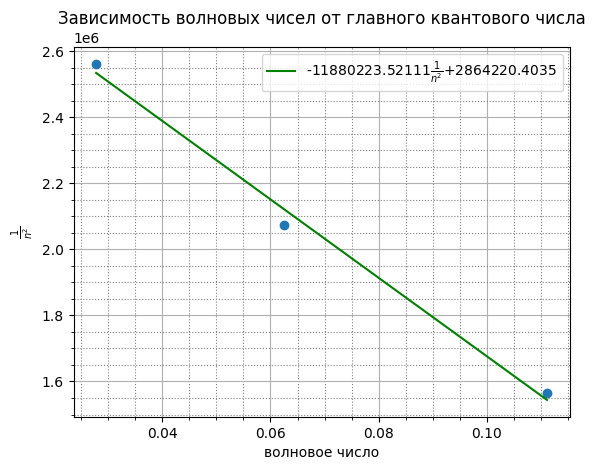

In [ ]:
h_wavelengths = [h_wl_red, h_wl_blue, h_wl_purple]

wavenumbers = [1 / wl * math.pow(10, 9) for wl in h_wavelengths]

numbers = [1/9, 1/16, 1/36]

a1, b1 = np.polyfit(numbers, wavenumbers, 1)
wavenumbers_grad = [a1 * number + b1 for number in numbers]

print(a1, b1)

a_str = str(round(a1, 5))
b_str = str(round(b1, 5)) if b1 < 0 else '+' + str(round(b1, 4))

grad_label = a_str + r'$\frac{1}{n^2}$' + b_str

plt.minorticks_on()
plt.grid(True, which='both')
plt.grid(which='minor', color='gray', linestyle=':')

plt.plot(numbers, wavenumbers, 'o')
plt.plot(numbers, wavenumbers_grad, color='green', label=grad_label)
plt.title("Зависимость волновых чисел от главного квантового числа")
plt.xlabel('волновое число')
plt.ylabel(r'$\frac{1}{n^2}$')
plt.legend()
plt.show()

In [ ]:
R_exp_coef = -a1
R_exp_plot = 4 * b1

m = 9.1 * math.pow(10, -31)
e = 1.6 * math.pow(10, -19)
c = 3 * math.pow(10, 8)
h = 6.63 * math.pow(10, -34)
e_0 = 8.85 * math.pow(10, -12)

R_theor = m * math.pow(e, 4) / (8 * c * math.pow(h, 3) * math.pow(e_0, 2))

print('по угловому коэффициенту', round(R_exp_coef))
print('из графика по значению R/4', round(R_exp_plot))
print('теоретическое значение', round(R_theor))

по угловому коэффициенту 11880224
из графика по значению R/4 11456882
теоретическое значение 10886367


In [ ]:
def E_n(R):
  return -h * c * R / 4 * 6.24 * math.pow(10, 18)

In [ ]:
E_n_exp_coef = E_n(R_exp_coef)
E_n_exp_plot = E_n(R_exp_plot)
E_n_theor = E_n(R_theor)

print('экспериментальная по угловому коэффициенту', round(E_n_exp_coef, 2))
print('экспериментальная из графика по значению R/4', round(E_n_exp_plot, 2))
print('теоретическое значение', round(E_n_theor, 2))

экспериментальная по угловому коэффициенту -3.69
экспериментальная из графика по значению R/4 -3.55
теоретическое значение -3.38
